# Cleaning the Messy Employee Dataset

### Data Source Link: https://www.kaggle.com/datasets/desolution01/messy-employee-dataset?resource=download

<b> For this file, we will be cleaning the Messy Employee Dataset. We will also be doing some explanatory data analysis. 

### Loading in Important Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

import datetime

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

%precision 4

'%.4f'

In [2]:
#Loads in our dataset into the variable "df"
df = pd.read_csv("Messy_Employee_Dataset.csv")

In [3]:
#Give us the number of rows and columns within our dataset
df.shape

(1020, 12)

In [4]:
#Produces a table that shows the columns, their data type, and number of objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   First_Name         1020 non-null   object 
 2   Last_Name          1020 non-null   object 
 3   Age                809 non-null    float64
 4   Department_Region  1020 non-null   object 
 5   Status             1020 non-null   object 
 6   Join_Date          1020 non-null   object 
 7   Salary             996 non-null    float64
 8   Email              1020 non-null   object 
 9   Phone              1020 non-null   int64  
 10  Performance_Score  1020 non-null   object 
 11  Remote_Work        1020 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 88.8+ KB


From this, we can see a couple of things. Both Salary and Age have missing values. Additionally, the data types for the phone column and the Join_Data column are incorrect. As such, we will start by cleaning these items first. 

In [5]:
#Gives us the first 5 row in the data set
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


### Getting rid of null values

Since both salary and age are quantitative variables, we will replace the blank values with the mean of their respective columns

In [6]:
#Gives the mean of the age variable
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Age"] = df.Age.apply(lambda x: round(x, 2))

In [7]:
#Gives the mean of the salary variable
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

In [8]:
#Shows the new change to the dataset
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.00,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True
1,EMP1001,Bob,Brown,32.48,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True
2,EMP1002,Alice,Jones,32.48,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True
3,EMP1003,Eva,Davis,25.00,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True
4,EMP1004,Frank,Williams,25.00,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False


### Changing datatypes

Next, we must change the datatypes for both Join_Date and Phone

In [9]:
# Changes Join_Date to a datetime data type
df["Join_Date"] = pd.to_datetime(df["Join_Date"])

In [10]:
#Gets rid of the negative symbol within the Phone column and turns them in string values
df["Phone"] = df["Phone"] * -1
df["Phone"] = df["Phone"].astype("string")

In [11]:
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work
0,EMP1000,Bob,Davis,25.00,DevOps-California,Active,2021-04-02,59767.65,bob.davis@example.com,1651623197,Average,True
1,EMP1001,Bob,Brown,32.48,Finance-Texas,Active,2020-07-10,65304.66,bob.brown@example.com,1898471390,Excellent,True
2,EMP1002,Alice,Jones,32.48,Admin-Nevada,Pending,2023-12-07,88145.90,alice.jones@example.com,5596363211,Good,True
3,EMP1003,Eva,Davis,25.00,Admin-Nevada,Inactive,2021-11-27,69450.99,eva.davis@example.com,3476490784,Good,True
4,EMP1004,Frank,Williams,25.00,Cloud Tech-Florida,Active,2022-01-05,109324.61,frank.williams@example.com,1586734256,Poor,False


In [12]:
### Now that the datatypes are all correct, we can also split up the Department_Region column

In [13]:
#Separates the Department_Region in the Department and Region. Then, deletes the Department_Region
df[["Department", "Region"]] = df["Department_Region"].str.split("-", expand = True)
del df["Department_Region"]

In [14]:
df.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.00,Active,2021-04-02,59767.65,bob.davis@example.com,1651623197,Average,True,DevOps,California
1,EMP1001,Bob,Brown,32.48,Active,2020-07-10,65304.66,bob.brown@example.com,1898471390,Excellent,True,Finance,Texas
2,EMP1002,Alice,Jones,32.48,Pending,2023-12-07,88145.90,alice.jones@example.com,5596363211,Good,True,Admin,Nevada
3,EMP1003,Eva,Davis,25.00,Inactive,2021-11-27,69450.99,eva.davis@example.com,3476490784,Good,True,Admin,Nevada
4,EMP1004,Frank,Williams,25.00,Active,2022-01-05,109324.61,frank.williams@example.com,1586734256,Poor,False,Cloud Tech,Florida


In [15]:
df.isnull().sum().sum()

0

In [16]:
#Puts the clean version of the dataset into a variable called df_clean
df_clean = df

In [17]:
df_clean.isnull().sum().sum()

0

In [18]:
df_clean.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.00,Active,2021-04-02,59767.65,bob.davis@example.com,1651623197,Average,True,DevOps,California
1,EMP1001,Bob,Brown,32.48,Active,2020-07-10,65304.66,bob.brown@example.com,1898471390,Excellent,True,Finance,Texas
2,EMP1002,Alice,Jones,32.48,Pending,2023-12-07,88145.90,alice.jones@example.com,5596363211,Good,True,Admin,Nevada
3,EMP1003,Eva,Davis,25.00,Inactive,2021-11-27,69450.99,eva.davis@example.com,3476490784,Good,True,Admin,Nevada
4,EMP1004,Frank,Williams,25.00,Active,2022-01-05,109324.61,frank.williams@example.com,1586734256,Poor,False,Cloud Tech,Florida


In [19]:
#Creates a new csv file with the cleaned dataset
df_clean.to_csv("Messy_Employee_Dataset_Clean.csv", index = False)

### Explorative Data Analysis

For Data Analysis, we will need to transform some of the variables in order to analyze the information. Primarily, we will change Performance score into ordinal number variables and Remote_work into binary 1-and-0's. 

In [20]:
#Maps both Remote_Work and Performance_Score outcomes to numbers
df_clean["Remote_Work"] = df_clean.Remote_Work.map({True:1, False:0})
df_clean["Performance_Score"] = df_clean.Performance_Score.map({"Poor": 0, "Average": 1,
                                                                "Good": 2, "Excellent": 3})

In [21]:
df_clean.head()

,Employee_ID,First_Name,Last_Name,Age,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.00,Active,2021-04-02,59767.65,bob.davis@example.com,1651623197,1,1,DevOps,California
1,EMP1001,Bob,Brown,32.48,Active,2020-07-10,65304.66,bob.brown@example.com,1898471390,3,1,Finance,Texas
2,EMP1002,Alice,Jones,32.48,Pending,2023-12-07,88145.90,alice.jones@example.com,5596363211,2,1,Admin,Nevada
3,EMP1003,Eva,Davis,25.00,Inactive,2021-11-27,69450.99,eva.davis@example.com,3476490784,2,1,Admin,Nevada
4,EMP1004,Frank,Williams,25.00,Active,2022-01-05,109324.61,frank.williams@example.com,1586734256,0,0,Cloud Tech,Florida


2    0.264706
1    0.261765
3    0.261765
0    0.211765
Name: Performance_Score, dtype: float64


<Axes: xlabel='Performance_Score', ylabel='count'>

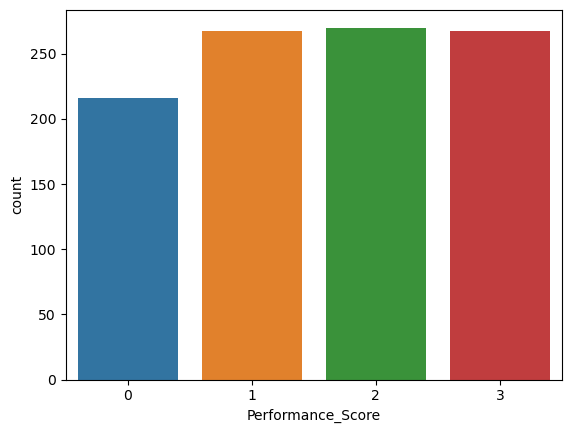

In [23]:
# Gets the distribution of Performance Score as well as creates a graph. 
print(df_clean.Performance_Score.value_counts()/df_clean.Performance_Score.count())
sns.countplot(x='Performance_Score', data = df_clean)

1    0.502941
0    0.497059
Name: Remote_Work, dtype: float64


<Axes: xlabel='Remote_Work', ylabel='count'>

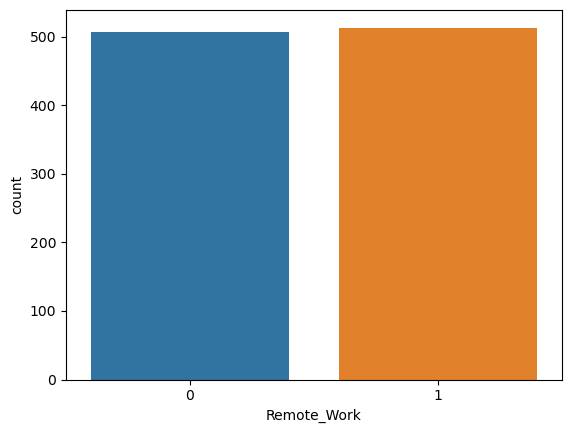

In [25]:
print(df_clean.Remote_Work.value_counts()/df_clean.Remote_Work.count())
sns.countplot(x='Remote_Work', data = df_clean)

It seems that both Performance Score and Remote Work outcome variables are equal to one another. Though 0/poor outcome for Performance Score is slightly lower than the other categories.

In [26]:
print(df_clean.Department.value_counts()/df_clean.Department.count())
print(df_clean.Region.value_counts()/df_clean.Region.count())

DevOps        0.185294
Sales         0.174510
HR            0.167647
Finance       0.166667
Admin         0.162745
Cloud Tech    0.143137
Name: Department, dtype: float64
California    0.183333
Florida       0.181373
Nevada        0.165686
Illinois      0.161765
New York      0.157843
Texas         0.150000
Name: Region, dtype: float64


It seems as though both Department and Region have around equal distribution in their outcomes. Now that we have some distrbutions, there are several things that we can analyze. 

1. Performance and Salary based on Remote Work
2. Performance and Salary based Region
3. Relationship between performance and salary

### Performance and Salary based on Remote Work

<Axes: xlabel='Remote_Work', ylabel='Salary'>

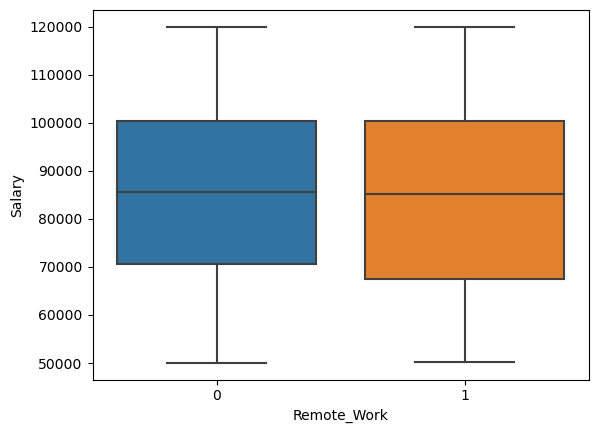

In [28]:
sns.boxplot(x = "Remote_Work", y = "Salary", data = df_clean)

<Axes: xlabel='Performance_Score', ylabel='Salary'>

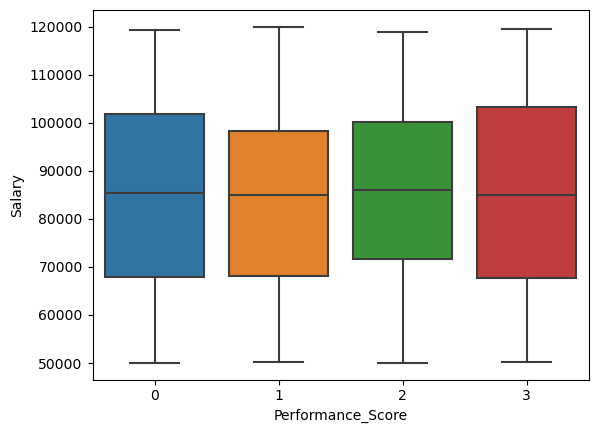

In [29]:
sns.boxplot(x = "Performance_Score", y = "Salary", data = df_clean)

Analyzing the two boxplots and the barplot, there appears to be no significance difference in Salary based on either Remote Work or Performanc Score

### Salary differences based on Department and Region

<Axes: xlabel='Department', ylabel='Salary'>

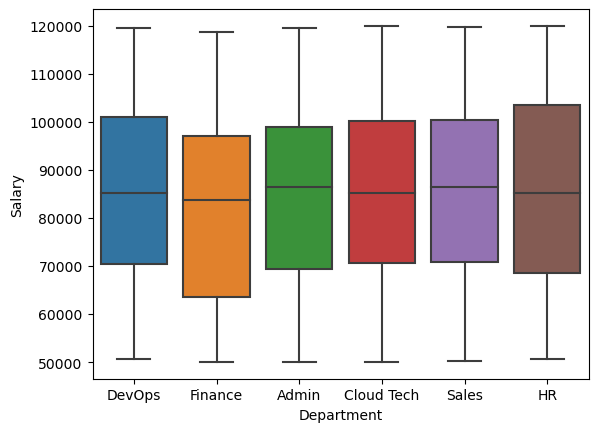

In [35]:
sns.boxplot(x = "Department", y = "Salary", data = df_clean)

<Axes: xlabel='Region', ylabel='Salary'>

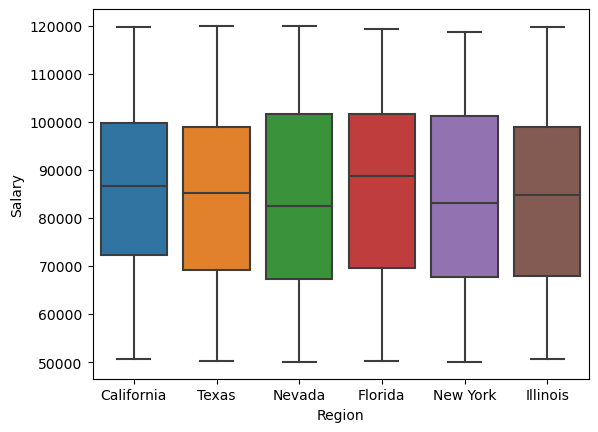

In [36]:
sns.boxplot(x = "Region", y = "Salary", data = df_clean)

There does not appear to be any additional difference in Salary based on Region and Salary either. For further analysis we will move to Tableau.